In [1]:
import pandas as pd
import numpy as np





filename = "/content/home240_hall2226_sensor14265_gas-pulse_gas.csv"

# Read the data from the CSV file
data2 = pd.read_csv(filename, header=None)

data2.head()
data2.columns = ['datetime', 'gas']

In [2]:
data2['datetime'] = pd.to_datetime(data2['datetime'])

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50053 entries, 0 to 50052
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  50053 non-null  datetime64[ns]
 1   gas       50053 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 782.2 KB


In [4]:
# calculate the time difference between consecutive rows
data2['time_diff'] = data2['datetime'].diff().dt.seconds

In [5]:
data2['gas'] = (data2['gas'] - 112)

In [6]:
data2

,datetime,gas,time_diff
0,2017-11-06 10:37:05,0,NaN
1,2017-11-06 10:37:17,0,12.0
2,2017-11-06 10:37:30,0,13.0
3,2017-11-06 10:37:44,0,14.0
4,2017-11-06 10:37:59,0,15.0
...,...,...,...
50048,2018-06-30 18:44:04,0,1286.0
50049,2018-06-30 18:49:09,0,305.0
50050,2018-06-30 18:53:08,0,239.0
50051,2018-06-30 18:55:32,0,144.0


In [10]:
daily = data2.resample('D', on='datetime').sum()

In [11]:
daily

,gas,time_diff
datetime,,
2017-11-06,778,30817.0
2017-11-07,333,97768.0
2017-11-08,777,86109.0
2017-11-09,333,73878.0
2017-11-10,6014,88234.0
...,...,...
2018-06-26,444,86413.0
2018-06-27,111,81920.0
2018-06-28,0,103705.0


from matplotlib import pyplot as plt
daily['gas'].plot(kind='hist', bins=20, title='gas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
daily['time_diff'].plot(kind='hist', bins=20, title='time_diff')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
daily.plot(kind='scatter', x='gas', y='time_diff', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_diff']
  ys = series['gas']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = daily.sort_values('time_diff', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_diff')
_ = plt.ylabel('gas')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_diff']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_diff'}, axis=1)
              .sort_values('time_diff', ascending=True))
  xs = counted['time_diff']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = daily.sort_values('time_diff', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_diff')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
daily['gas'].plot(kind='line', figsize=(8, 4), title='gas')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
daily['time_diff'].plot(kind='line', figsize=(8, 4), title='time_diff')
plt.gca().spines[['top', 'right']].set_visible(False)

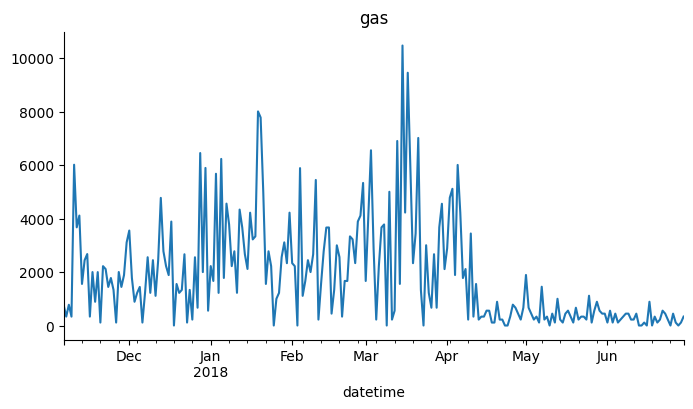

In [15]:
from matplotlib import pyplot as plt
daily['gas'].plot(kind='line', figsize=(8, 4), title='gas')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2017-11-06 to 2018-06-30
Freq: D
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas        237 non-null    int64  
 1   time_diff  237 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB


In [14]:
daily